# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

В ходе исследования необходимо выполнить:
- предоработку данных (выяления дубликатов, обработка пропущенных значений и устранение выбросов)
- расчеты и расширить датасет новыми параметрами, для анализа
- проанализировать и визуализировать данные и зависимости (влияние основных параметров на стоимость объекта, сравнить стоимоть объектов по населенным пунктам и т.д.)

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings

In [2]:
warnings.filterwarnings("ignore")

In [3]:
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
    
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

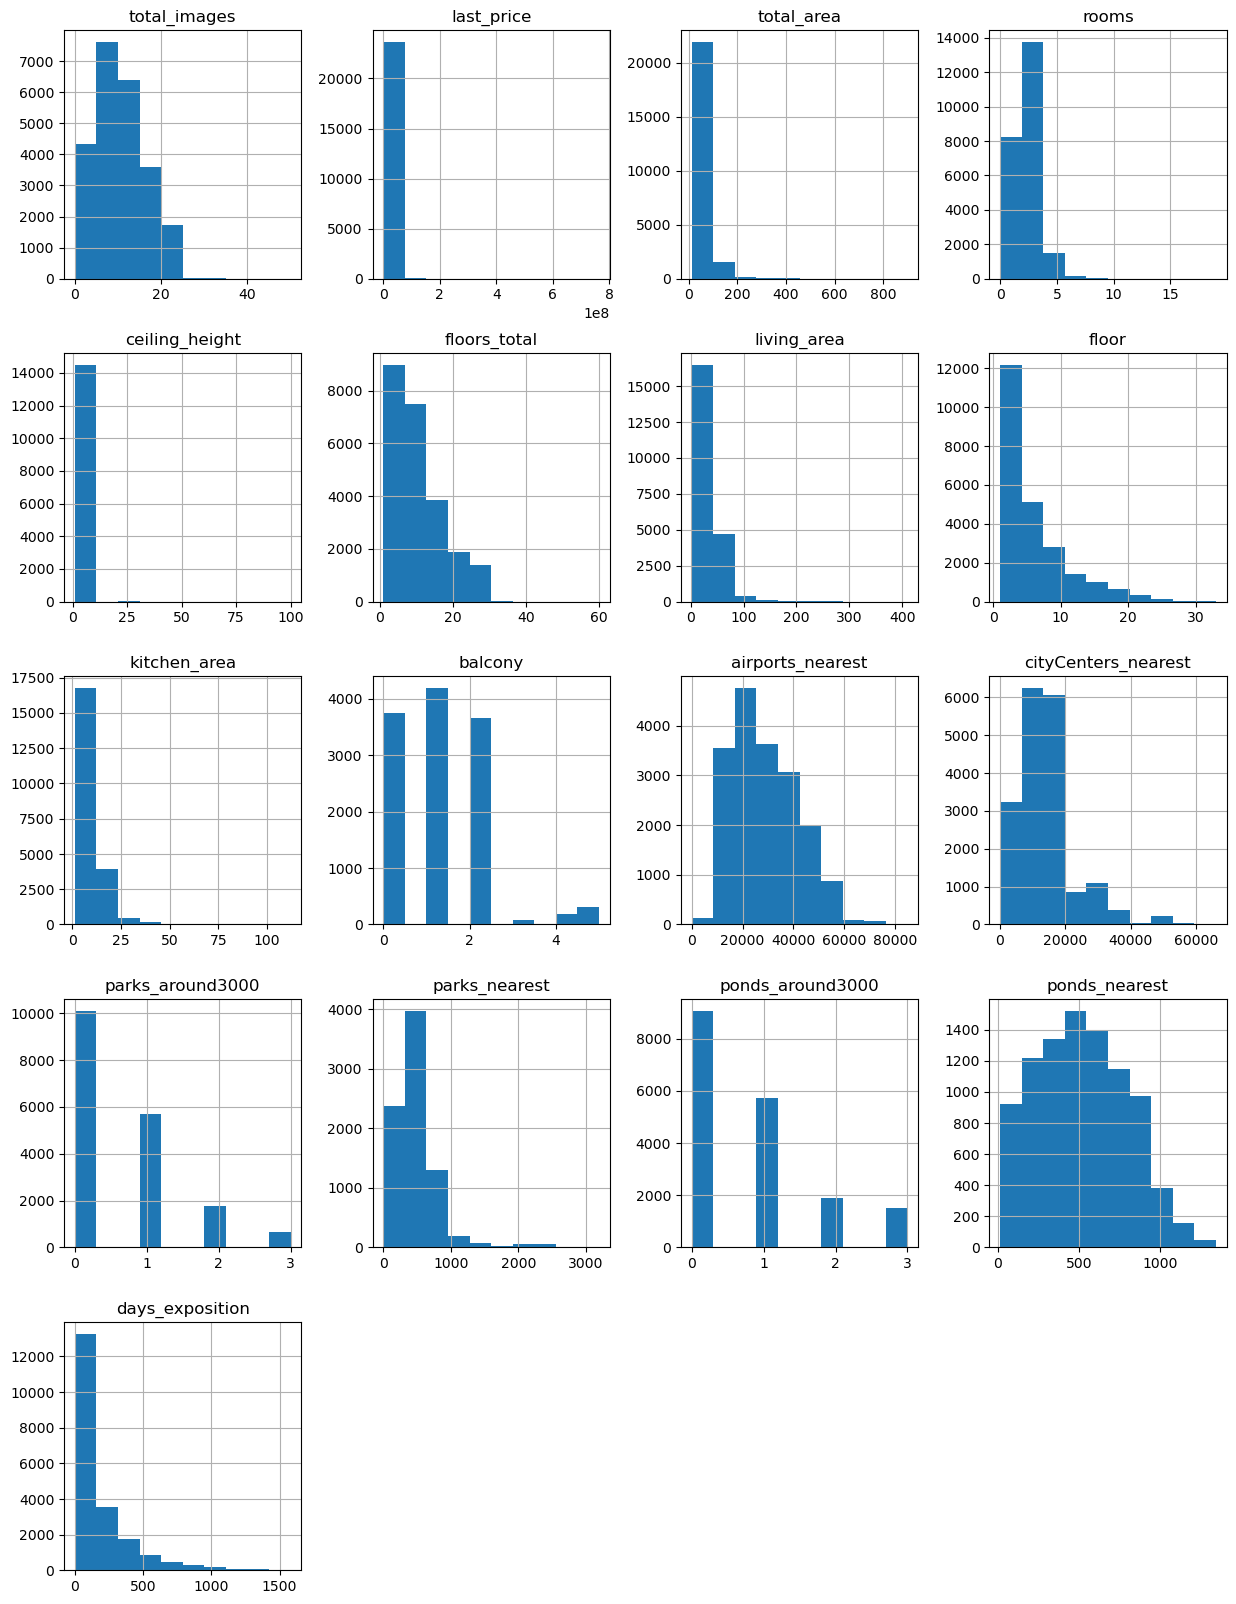

In [5]:
data.hist(figsize=(15, 20));

### Предобработка данных

In [6]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

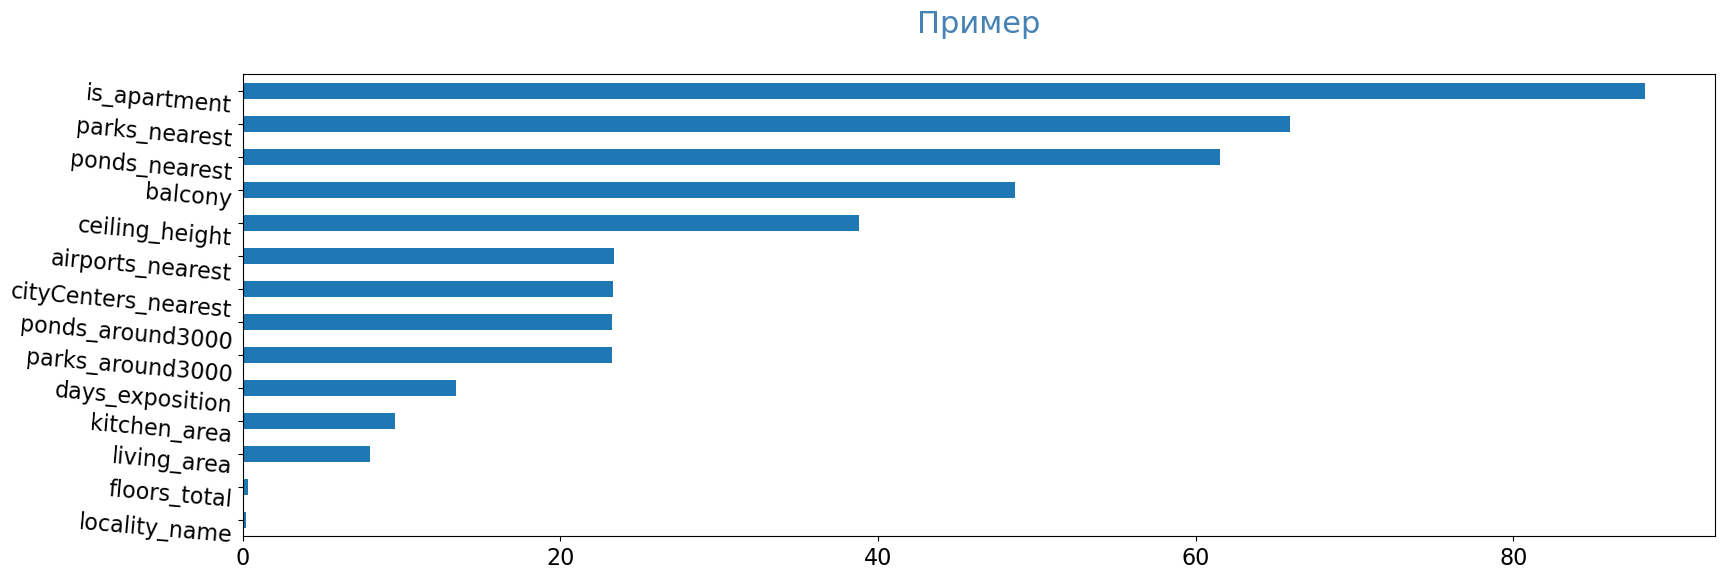

In [7]:
pass_value_barh(data)

#### Обработка пропусков

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data['days_exposition'] = data['days_exposition'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data = data.dropna(subset=['floors_total'])

Анализ пропусков:

- пропуски в столбце 'is_apartment' заменили булевым занчением False, т.к. отсутвие данного занчение означает, что это не апартаменты
- проруски в столбце 'balcony' заполнили 0, т.к. отсутвие данного занчение говорит о том, что балкона в принципе нет
- пропуски в столбце 'days_exposition' заменели на 0, т.к. отсутствие данного означает, что объявление провисело меньше суток
- пропуски в стобцах 'parks_around3000' и 'ponds_around3000' заполнили 0, отсутствие парков и водоемов поблизости
- пропуски в столбце 'floors_total' удалим, т.к. их очень мало и стоит изменить тип данных на int

Количество пропусков в столбцах 'airports_nearest ', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000' практически одинаково, что может свидетель удалённость квартиры от города. Причины пропусков в других столбцах неизветны. Возможные причины их появления - это отсутвие данных (например нет парков и водоёмов поблизости) и человеческий фактор.

#### Работа с типами данных

In [10]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['balcony'] = data['balcony'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')
data['floors_total'] = data['floors_total'].astype('int')

Изменение типов данных:

- изменили тип данных в столбце 'first_day_exposition', привери к данным даты без вермени, т.к. оно отсутствует
- в столбце 'balcony', извенили на int, т.к. балконов может быть только целое число
- количесво дней 'days_exposition' в датафрейме заполнено таком образом, что уитываются только целые дни
- количесво этажей целое число

Остальные данные, где также можно привети к int оставили нетронутыми, т.к. есть пропущенные значения и нет такой необходимости.

#### Обработка дубликатов

In [11]:
data.duplicated().sum()

0

Явных дубликатов не обнаружено. Неявые дубликаты могут находиться в столбце с названием населенных пунктов.

In [12]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [13]:
dupl_list = [
    'поселок городского типа', 
    'посёлок городского типа', 
    'посёлок', 
    'городской поселок', 
    'городской посёлок',
]
for dupl in dupl_list:
    data['locality_name'] = data['locality_name'].str.replace(dupl, 'поселок')

Привели все неявные дубликаты к одному виду.

In [14]:
data.locality_name.nunique()

322

#### Обработка выбивающихся значений

In [15]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,613.00","23,613.00","14,495.00","23,613.00","23,613.00","21,743.00","21,382.00","23,613.00","23,613.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,100.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00
median,2.00,52.00,2.65,73.00,"4,650,000.00",30.00,9.10,4.00,9.00


In [16]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,20.00,2.30,0.00,"561,672.00",10.00,3.80,1.00,2.00
0.010000,1.00,25.33,2.50,0.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.500000,2.00,52.00,2.65,73.00,"4,650,000.00",30.00,9.10,4.00,9.00
0.990000,5.00,197.18,3.83,"1,043.00","36,000,000.00",120.00,35.06,23.00,26.00
0.998800,8.00,380.00,25.00,"1,361.67","124,826,112.00",219.82,60.00,26.00,35.00


In [17]:
data.rooms.value_counts().to_frame()

,rooms
1,8015
2,7913
3,5795
4,1177
5,325
0,194
6,104
7,59
8,12
9,8


Квартиры с 7 комнатами вы выше встречаются редко, стоит отбросить данные значения.

In [18]:
data = data.query('rooms <= 7')

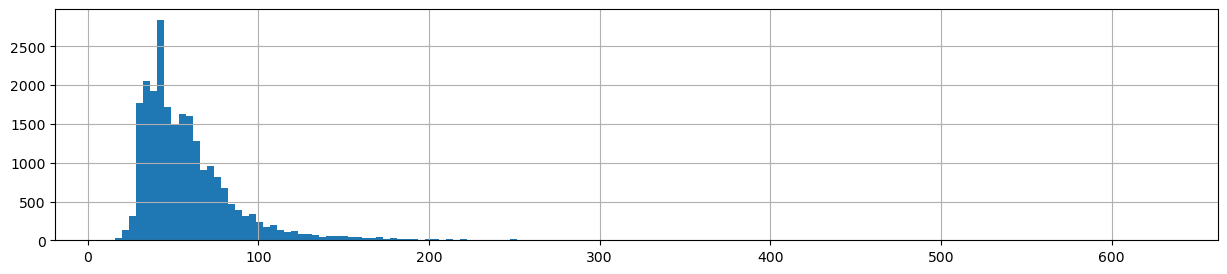

In [19]:
data['total_area'].hist(bins = 150, figsize = (15,3));

Кваритры до 20 и более 200 кв.м встречаются крайне редко

In [20]:
data = data.query('20 <= total_area <= 200')

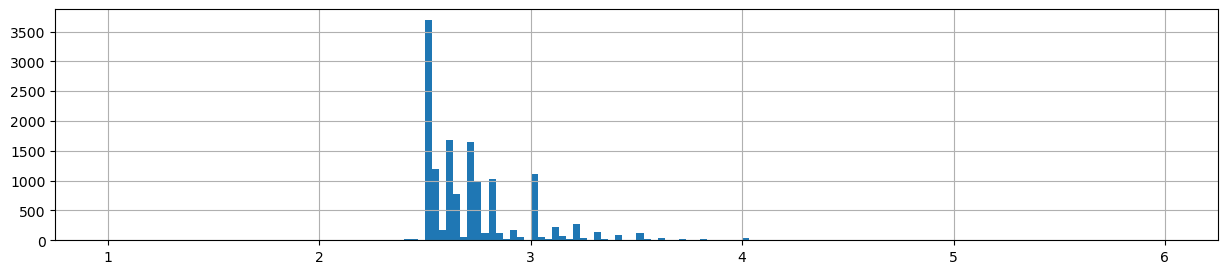

In [21]:
data.ceiling_height.hist(bins = 150, figsize = (15,3), range = (1,6));

Квартиры с потолками выше 4 крайне редко встречаются, но здесь много пропусков, поэтому заменим выбивающиеся значенния на NaN.

In [22]:
data.loc[data['ceiling_height'] > 4, 'ceiling_height'] = np.nan

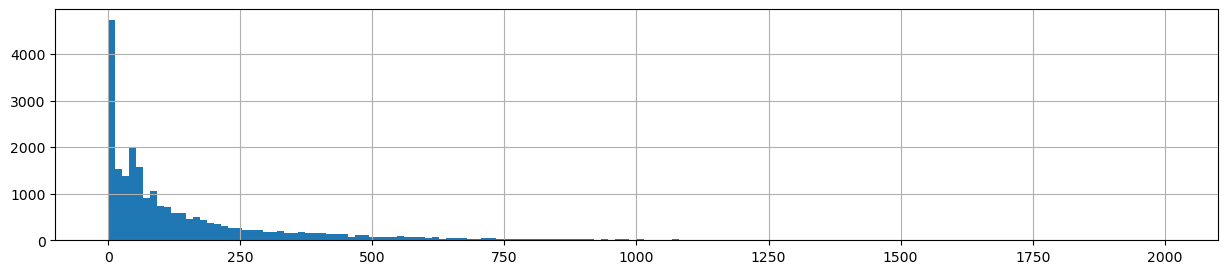

In [23]:
data.days_exposition.hist(bins = 150, figsize = (15,3), range = (0,2000));

Квартиры на продаже более 1050 дней редкое явление, но здесь много пропусков, поэтому заменим выбивающиеся значенния на NaN.

In [24]:
data.loc[data['days_exposition'] > 1050, 'days_exposition'] = np.nan

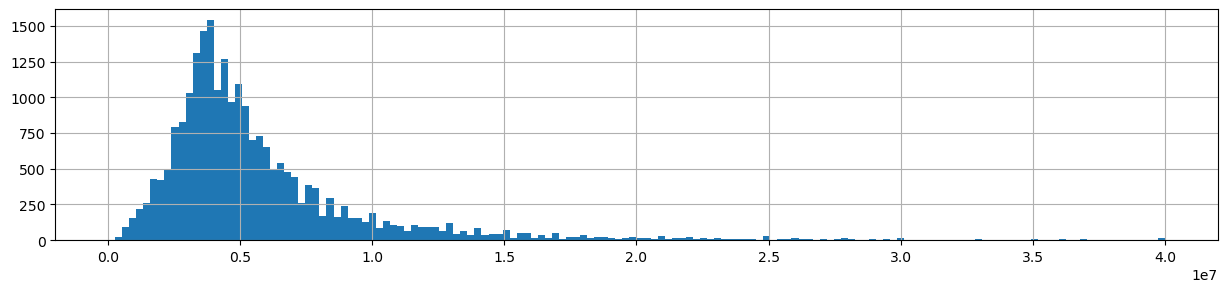

In [25]:
data.last_price.hist(bins = 150, figsize = (15,3), range = (0,40000000));

Цена выше 36 млн встречается крайне редко, можно удалить.

In [26]:
data = data.query('last_price <= 36000000')

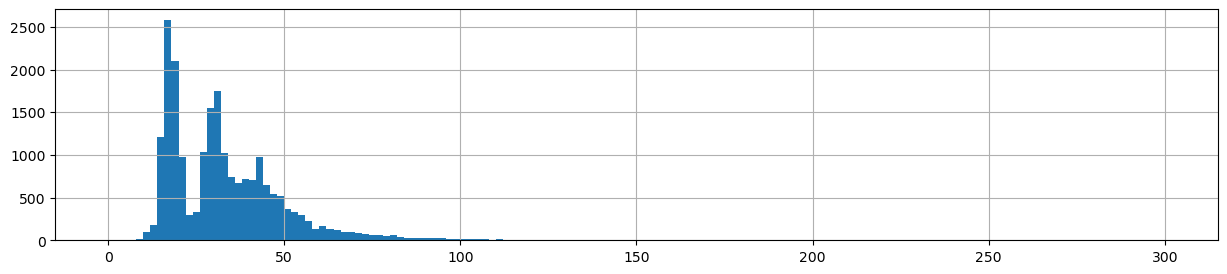

In [27]:
data.living_area.hist(bins = 150, figsize = (15,3), range = (0,300));

Объекты с площадью менее 10 и более 120 являтся выпадающими значениями.

In [28]:
data.loc[(data['living_area'] < 10) & (data['living_area'] > 120), 'living_area'] = np.nan

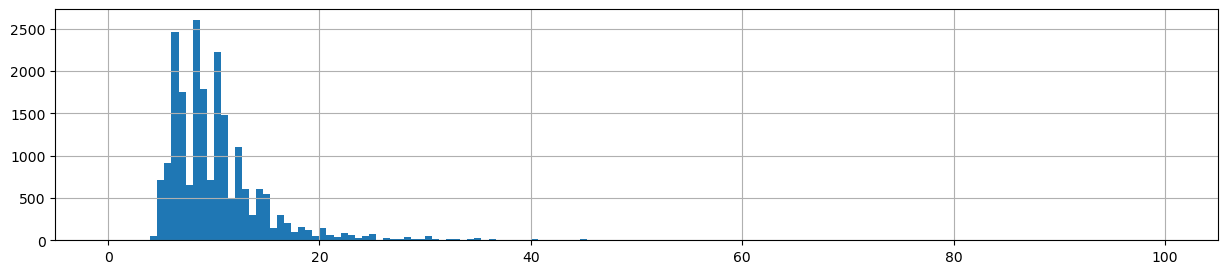

In [29]:
data.kitchen_area.hist(bins = 150, figsize = (15,3), range = (0,100));

Аналогичная ситуация и с кухней.

In [30]:
data.loc[(data['kitchen_area'] < 3) & (data['kitchen_area'] > 36), 'kitchen_area'] = np.nan

In [31]:
data.floor.value_counts().to_frame()

,floor
2,3306
3,3009
1,2882
4,2721
5,2566
6,1268
7,1185
8,1058
9,1042
10,679


Стоит рассматривать дома до 25 этажа.

In [32]:
data = data.loc[(data['floor'] <= 25)]

In [33]:
data.floors_total.value_counts().to_frame()

,floors_total
5,5694
9,3737
16,1369
12,1351
10,1164
4,1163
25,1074
6,853
17,828
3,647


Здесь аналогичная ситуация.

In [34]:
data = data.loc[(data['floors_total'] <= 26)]

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23005 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23005 non-null  int64         
 1   last_price            23005 non-null  float64       
 2   total_area            23005 non-null  float64       
 3   first_day_exposition  23005 non-null  datetime64[ns]
 4   rooms                 23005 non-null  int64         
 5   ceiling_height        14092 non-null  float64       
 6   floors_total          23005 non-null  int32         
 7   living_area           21197 non-null  float64       
 8   floor                 23005 non-null  int64         
 9   is_apartment          23005 non-null  bool          
 10  studio                23005 non-null  bool          
 11  open_plan             23005 non-null  bool          
 12  kitchen_area          20852 non-null  float64       
 13  balcony         

In [36]:

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max', 'median'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,005.00","23,005.00","14,092.00","22,792.00","23,005.00","21,197.00","20,852.00","23,005.00","23,005.00"
min,0.00,20.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,7.00,200.00,4.00,"1,050.00","36,000,000.00",164.70,65.00,25.00,26.00
median,2.00,51.70,2.65,71.00,"4,600,000.00",30.00,9.00,4.00,9.00


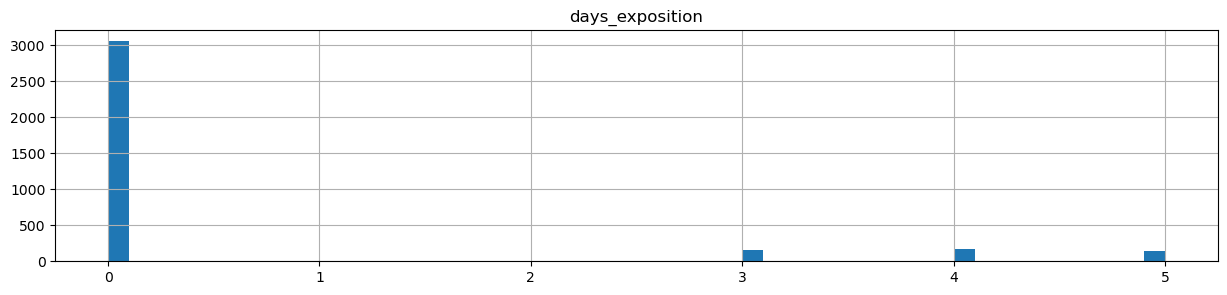

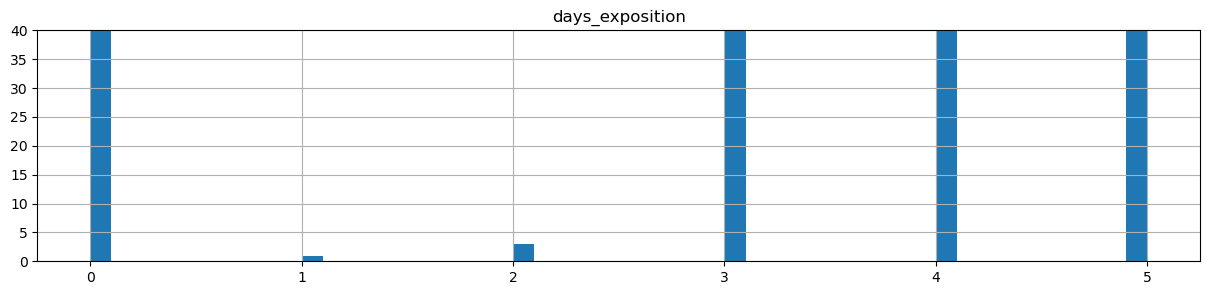

In [37]:
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5));

data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0,5))
plt.ylim(0, 40);

In [38]:
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.001200,0.00,21.66,2.30,0.00,"560,000.00",10.00,4.00,1.00,2.00
0.010000,1.00,26.00,2.50,0.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.500000,2.00,51.70,2.65,71.00,"4,600,000.00",30.00,9.00,4.00,9.00
0.990000,5.00,154.69,3.60,870.00,"23,998,724.48",94.55,31.10,22.00,25.00
0.998800,6.00,190.00,4.00,"1,013.65","33,618,560.00",125.50,46.78,25.00,26.00


### Посчитайте и добавьте в таблицу новые столбцы

In [39]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    elif 1 < floor < floors_total:
        return 'другой'

In [40]:
data['price_one_m2'] = data['last_price'] / data['total_area']
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year
data['floor_category'] = data.apply(floor_category, axis = 1)
data['cityCenters_nearest'] = round(data['cityCenters_nearest'] / 1000)
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m2,weekday_exposition,month_exposition,year_exposition,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1.0,482.0,2.0,755.0,0.0,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,NaN,12,14.4,5,False,...,0.0,NaN,0.0,NaN,55.0,95065.789474,0,9,2018,другой


### Проведите исследовательский анализ данных

#### Изучение основных параметров

<Axes: ylabel='Frequency'>

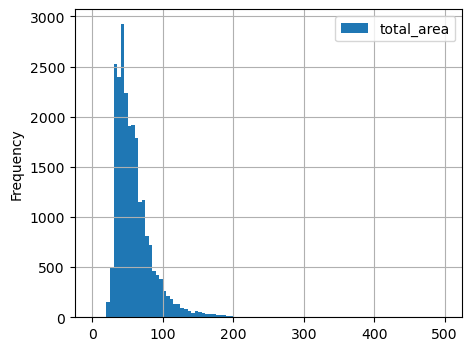

In [41]:
data.plot(y = 'total_area', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,500))

Большинсво квартир имеют площадь примерно 50-60 кв.м.

<Axes: ylabel='Frequency'>

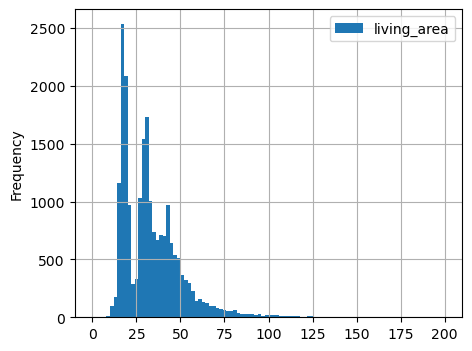

In [42]:
data.plot(y = 'living_area', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,200))

По данной гистограмме видны пики по жилой площади, что может свидтельсвоть о том, что для однокомнтаных квартир в среднем жилая площадь примерно 18 кв. м., а для двухкомнатных примерно 30 кв.м.

<Axes: ylabel='Frequency'>

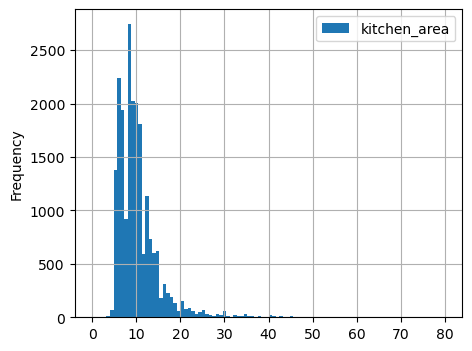

In [43]:
data.plot(y = 'kitchen_area', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,80))

В среденм на кухню приходится окло 8-9 кв.м.

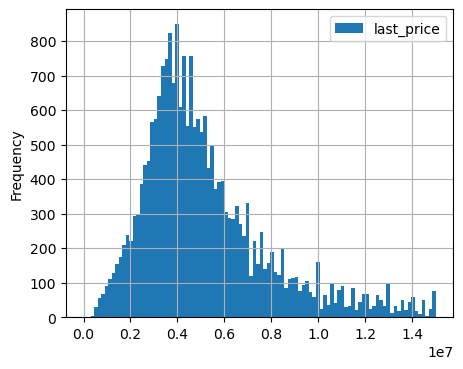

In [44]:
data.plot(y = 'last_price', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,15000000));

По данной гистограмме видно, что больше всего кваритир примерно за 4млн., скорее всего больше всего 1 и 2-комнатных квартир.

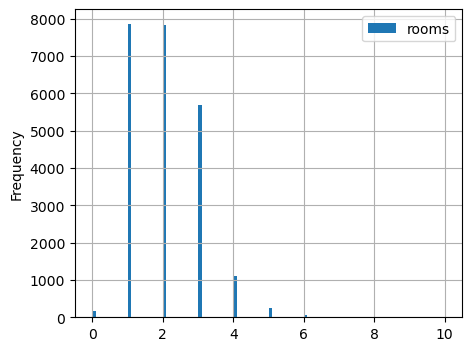

In [45]:
data.plot(y = 'rooms', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,10));

Квартиры более 3 комнат, встречаются гораздо реже. С 0 комнат квартиры возможно являются студии или апартаменты.

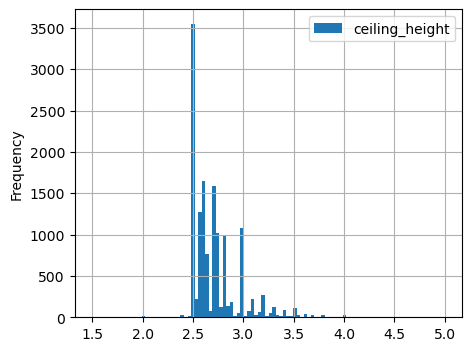

In [46]:
data.plot(y = 'ceiling_height', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (1.5,5));

В основном квартиры имеют среднюю высоту потолка около 2,5 м

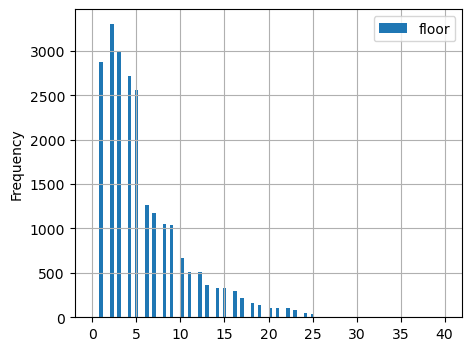

In [47]:
data.plot(y = 'floor', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,40));

Больше всего квартир продают до 5 этажа или частных домов.

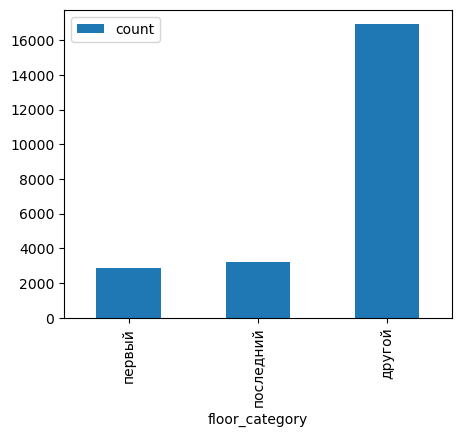

In [48]:
data_floor_category = data.groupby('floor_category')['floor_category'].agg(['count'])
data_floor_category.sort_values(by='count').plot(y='count', kind='bar', figsize=(5, 4));

Больше всего квартир на продаже не на первом и не на послденем этаже.

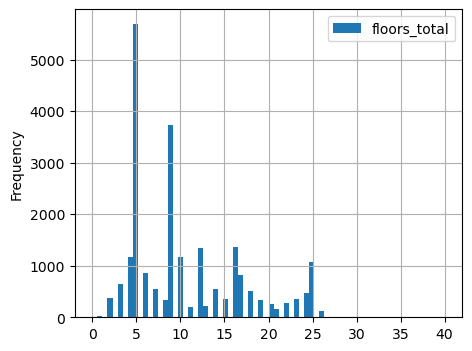

In [49]:
data.plot(y = 'floors_total', kind = 'hist', bins = 70, grid=True, figsize = (5,4), range = (0,40));

Больше всего пятиэтажных и девятиэтажных домов.

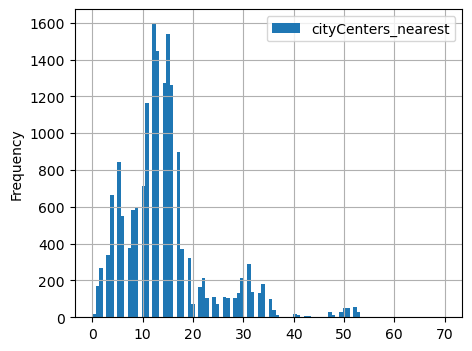

In [50]:
data.plot(y = 'cityCenters_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,70));

В основном квартиры продаются в 10-15 км от центра.

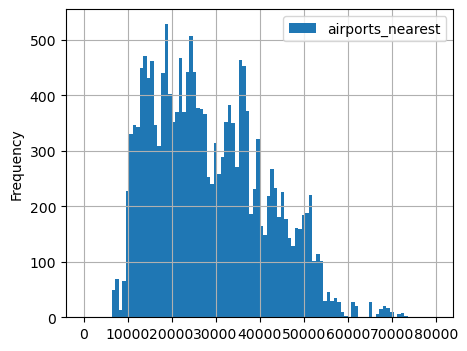

In [51]:
data.plot(y = 'airports_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,80000));

Среднее расстояние до аэропорта примерно 30км.

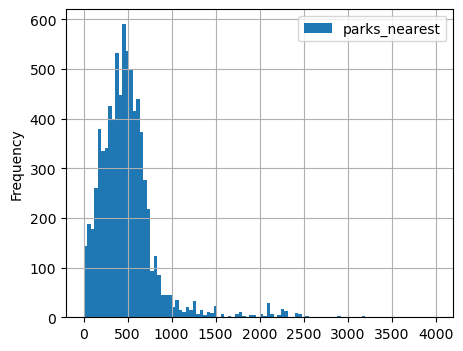

In [52]:
data.plot(y = 'parks_nearest', kind = 'hist', bins = 100, grid=True, figsize = (5,4), range = (0,4000));

Расстояние до парков не превышает 3км, т.к. за городом их впринципе нет.

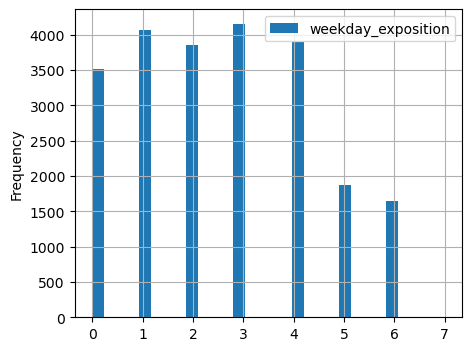

In [53]:
data.plot(y = 'weekday_exposition', kind = 'hist', bins = 30, grid=True, figsize = (5,4), range = (0,7));

Меньше всего публикация происходит на выходных.

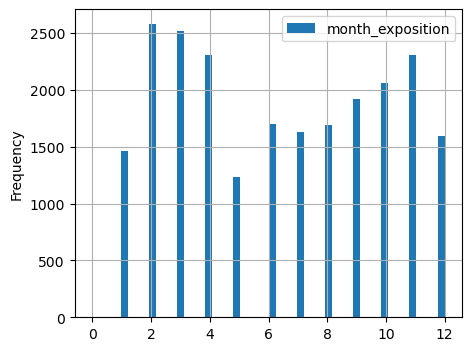

In [54]:
data.plot(y = 'month_exposition', kind = 'hist', bins = 50, grid=True, figsize = (5,4), range = (0,12));

Больше всего всего объявлений выкладывают в феврале, марте и ноябре, меньше всего летом.

#### Как быстро продовались квартиры

count    19735.000000
mean       168.414543
std        191.231829
min          1.000000
25%         44.000000
50%         93.000000
75%        221.000000
max       1050.000000
Name: days_exposition, dtype: float64

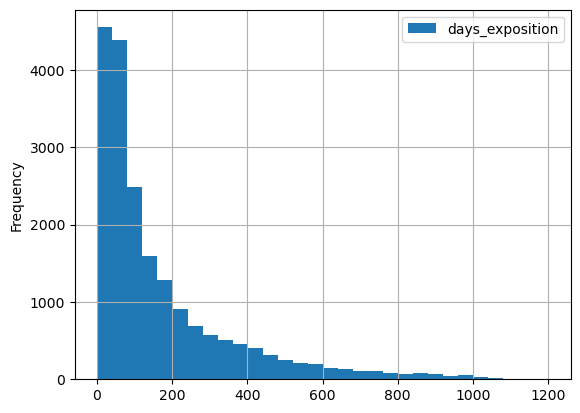

In [55]:
data.plot(y = 'days_exposition', kind = 'hist', bins = 30, grid = True, range = (1,1200));
data[data['days_exposition']!=0]['days_exposition'].describe()

Медианное занчение равно 93 дня, это в среднем приходится на продажу квартиры. Быстрой продажей явдлется до 44 дней, а долгой продажей более 221 дня.

In [56]:
data.groupby('year_exposition')['days_exposition'].agg(['mean'])

,mean
year_exposition,
2014,593.857143
2015,514.519547
2016,308.737059
2017,153.345931
2018,83.675439
2019,11.704245


С каждым годом скорость продажи увеличивалась, т.к. появлялись доп. опции по продвижению

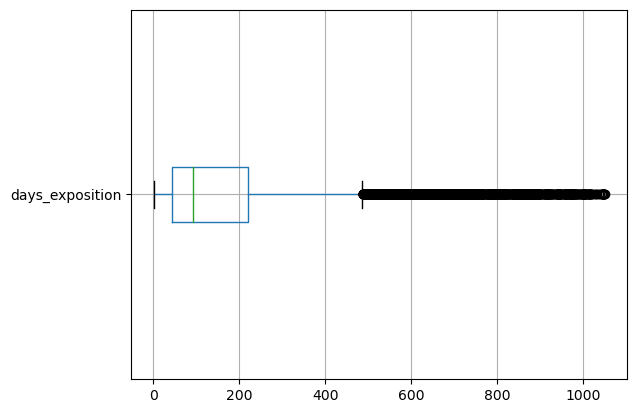

In [57]:
data[data['days_exposition']!=0][['days_exposition']].boxplot(vert=False);

In [58]:
data.days_exposition.value_counts().to_frame()

,days_exposition
0.0,3057
45.0,866
60.0,532
7.0,227
30.0,204
...,...
572.0,1
783.0,1
693.0,1
793.0,1


#### Влияние основных факторов на стоимость объекта

0.7793423662590201

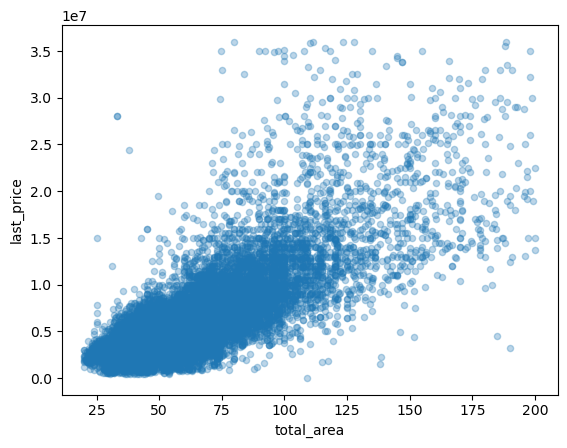

In [59]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)
data['last_price'].corr(data['total_area'])

С увеличением общей площади увеличивается и смоимость. Коэфицинт корреляции также свидетельсвует об этом.

0.6662932557810757

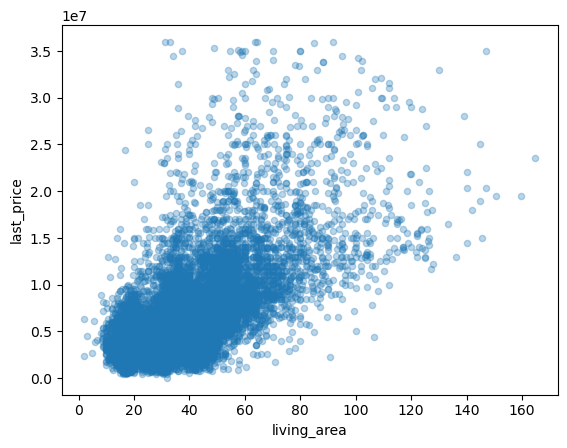

In [60]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3);
data['last_price'].corr(data['living_area'])

При увеличении жилой площади увеличивается и стоимость, но по коэфициенту корреляции видно, что степень влияния этого фактора меньше по сравнению с общей площадью.

0.5914111531669545

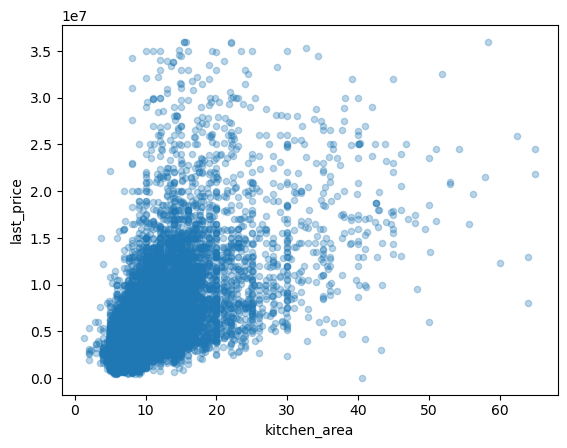

In [61]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3);
data['last_price'].corr(data['kitchen_area'])

При увеличении площади кухни увеличивается и стоимость, но по коэфициенту корреляции видно, что степень влияния этого фактора меньше чем цена по общей площади.

0.48565614413933156

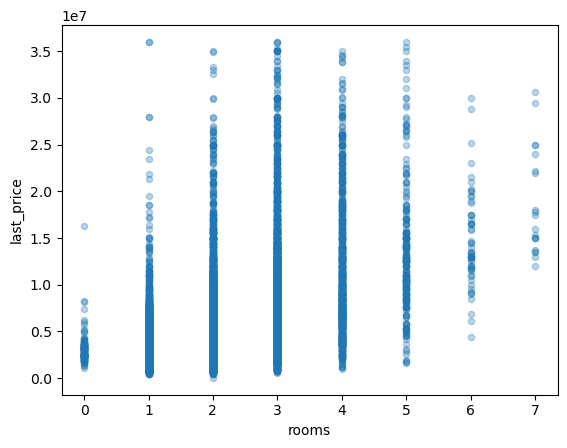

In [62]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3);
data['last_price'].corr(data['rooms'])

С увеличением комнат увеличивается и стоимость, но данный фактор не сильно на это влияет о чем свидетельствует коэфициент корреляции.

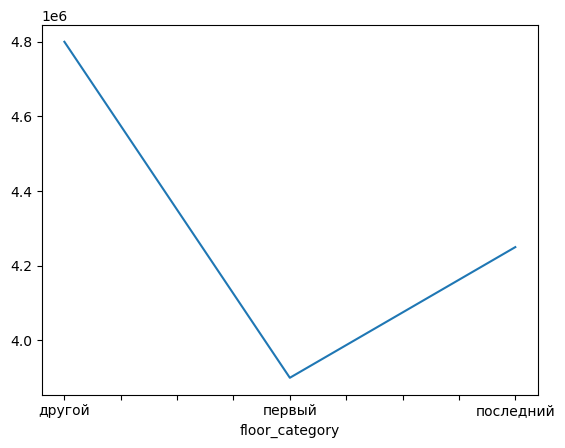

In [63]:
data_floor_category = data.groupby('floor_category')['last_price'].agg('median')
data_floor_category.plot(y='median');

Самый дешевые квартиры на первых этажа, а самые дорогие - это квартиры не первого и не последнего этажа.

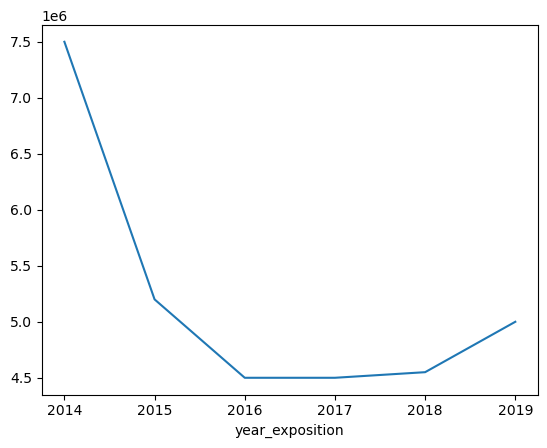

In [64]:
data_floor_category = data.groupby('year_exposition')['last_price'].agg('median')
data_floor_category.plot(y='median');

In [65]:
data.groupby('year_exposition')['last_price'].agg(['count','mean'])

,count,mean
year_exposition,,
2014,129,9.821507e+06
2015,1131,6.636825e+06
2016,2682,5.745204e+06
2017,7938,5.646370e+06
2018,8322,5.578507e+06
2019,2803,6.059846e+06


In [66]:
data.groupby('year_exposition')['total_area'].agg(['count','mean'])

,count,mean
year_exposition,,
2014,129,81.230310
2015,1131,65.448364
2016,2682,59.099586
2017,7938,57.811219
2018,8322,56.304772
2019,2803,56.817670


Цена на объкты к 2017 году падают из-за того, что увеличивалось количесво объявлений и уменьшались площади. После 2017 года средняя площадь уже не сильно менялась, но сама недвижимость дорожает с каждым годом.

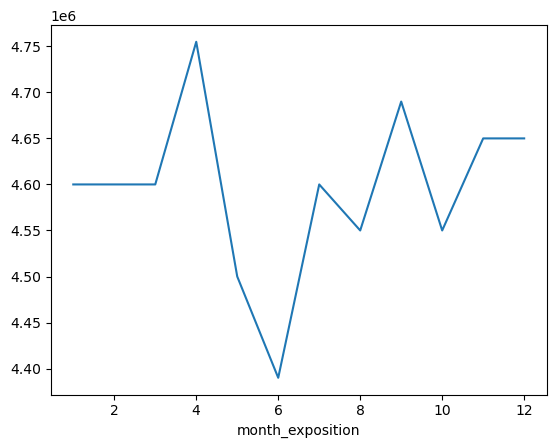

In [67]:
data_floor_category = data.groupby('month_exposition')['last_price'].agg('median')
data_floor_category.plot(y='median');

Здесь присутствует сезонность, летом квартиры дешевле всего.

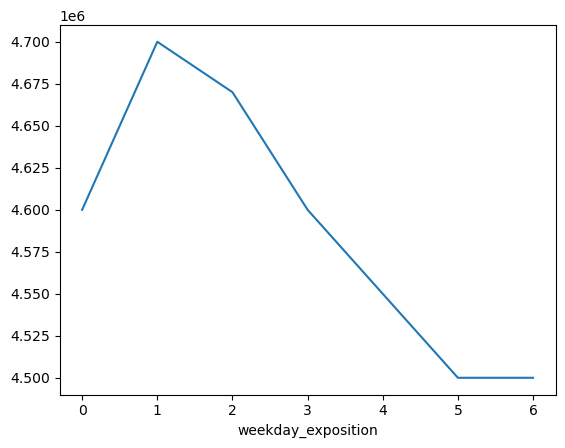

In [68]:
data_floor_category = data.groupby('weekday_exposition')['last_price'].agg('median')
data_floor_category.plot(y='median');

К выходным стоимоть квартир уменьшается.

#### Сравнение стоимости квадратного метра по населенным пунктам

In [69]:
data_max_count = data.groupby('locality_name')['price_one_m2'].agg(['count', 'mean'])
data_max_count_sort = data_max_count.sort_values(by='count', ascending = False).head(10)
data_max_count_sort['mean'] =  data_max_count_sort['mean'].round(1)
data_max_count_sort

,count,mean
locality_name,,
Санкт-Петербург,15210,111199.1
поселок Мурино,478,85716.6
поселок Шушары,437,78553.5
Всеволожск,398,68654.5
Пушкин,363,103077.2
Колпино,337,75333.3
Гатчина,307,68746.1
деревня Кудрово,298,92499.1
поселок Парголово,265,88980.7


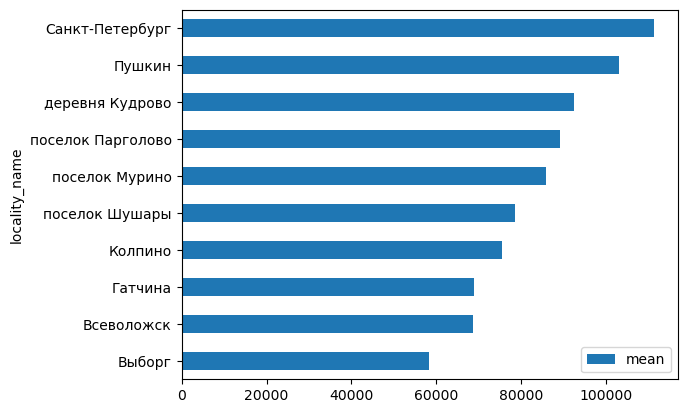

In [70]:
data_max_count_sort.sort_values(by='mean').plot(y='mean', kind='barh');

In [71]:
data_max_count_sort.query('mean == mean.max()')

,count,mean
locality_name,,
Санкт-Петербург,15210,111199.1


In [72]:
data_max_count_sort.query('mean == mean.min()')

,count,mean
locality_name,,
Выборг,237,58141.9


Cамые дорогие квартиры в Санкт-Петербурге, самые дешевые из списка с наибольшим количесвом объявлений в Выборге.

#### Зависимоть цены от расстояния до центра

In [73]:
data_spb = data.query('locality_name == "Санкт-Петербург"')
data_spb_group = data_spb.groupby('cityCenters_nearest')['last_price'].agg(['count', 'mean']).reset_index()
data_spb_group

,cityCenters_nearest,count,mean
0,0.0,20,1.659288e+07
1,1.0,168,1.217767e+07
2,2.0,267,1.080817e+07
3,3.0,336,9.858075e+06
4,4.0,658,1.052793e+07
5,5.0,842,1.077092e+07
6,6.0,548,1.011883e+07
7,7.0,377,1.005084e+07
8,8.0,580,8.874574e+06
9,9.0,588,6.860970e+06


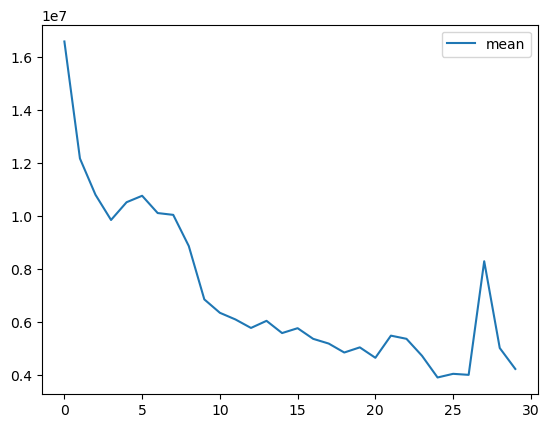

In [74]:
data_spb_group.plot(y='mean');

Чем ближе к центру, тем выше цена объекта.

In [75]:
data_spb_27 = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest == 27')
data_spb_27

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_m2,weekday_exposition,month_exposition,year_exposition,floor_category
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,False,...,1.0,1496.0,0.0,NaN,128.0,193918.918919,1,11,2017,другой
5961,6,2250000.0,32.0,2018-02-27,1,NaN,2,16.5,2,False,...,0.0,NaN,0.0,NaN,178.0,70312.500000,1,2,2018,последний


Выброс на 27 километре, из-за того там всего два объекта и один очень дорогой, что сильно влияет на искажение среднего.

In [76]:
data_spb_3 = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest == 3')
data_spb_3 = data_spb_3.groupby(['cityCenters_nearest', 'floor_category'])['last_price'].agg(['count', 'mean'])
data_spb_3['share'] = data_spb_3['count'] / data_spb_3['count'].sum()
data_spb_3

count          mean     share
cityCenters_nearest floor_category                               
3.0                 другой            205  1.045283e+07  0.610119
                    первый             54  7.468887e+06  0.160714
                    последний          77  9.950184e+06  0.229167

In [77]:
data_spb_5 = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest == 5')
data_spb_5 = data_spb_5.groupby(['cityCenters_nearest', 'floor_category'])['last_price'].agg(['count', 'mean'])
data_spb_5['share'] = data_spb_5['count'] / data_spb_5['count'].sum()
data_spb_5

count          mean     share
cityCenters_nearest floor_category                               
5.0                 другой            636  1.102280e+07  0.755344
                    первый             78  7.590769e+06  0.092637
                    последний         128  1.145729e+07  0.152019

Из данных видно, что квартир на "другом этаже " на 5-ом км больше, чем на 3-ем в количественном и процентном соотношении, поэтому средняя цена получилась выше на 5км.

### Общий вывод

На основе проведенного исследования, можно сделать выводы:

- в среднем объект продаётся за 93 дня
- порядка четверти всех объектов это квартиры в 5 этажном доме
- квартиры не на первом и не на последнем этаже стоят дороже
- больше всего объектов продаётся в Санкт-Петербурге
- самые дорогие квартиры в центре Санкт-Петербурга
- больше всего влияния на цену оказывает общая площадь квартиры, коэфициент корреляции 0,65
- дешевле всего квартиры на продажу выкладывают летом
- цена на на квартиры к 2017 году уменьшалась из-за падения средней площади и увеличения числа объявлений
- к выходным цена на квартиры уменьшается